# Non parallel way

Step    10/10 [100.0%]


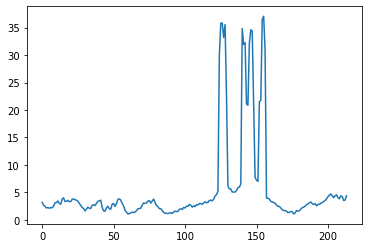

In [19]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import RMSF

from MDAnalysis.tests.datafiles import TPR, XTC

u = mda.Universe(TPR, XTC, in_memory=True)
protein = u.select_atoms("protein")

# 1) need a step to center and make whole: this trajectory
#    contains the protein being split across periodic boundaries
#

# 3) reference = average structure
reference_coordinates = u.trajectory.timeseries(asel=protein).mean(axis=1)
# make a reference structure (need to reshape into a 1-frame "trajectory")
reference = mda.Merge(protein).load_new(
            reference_coordinates[:, None, :], order="afc")

aligner = align.AlignTraj(u, reference, select="protein and name CA", in_memory=True).run()

calphas = protein.select_atoms("name CA")
rmsfer = RMSF(calphas, verbose=True).run()

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(calphas.resnums, rmsfer.rmsf)